In this project we are going to visualize on the dataset i.e "flight_price.xlsx".


In [11]:
#importing importent libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing the data set 
df = pd.read_excel("flight_price.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Step 1: Data Cleaning & Preprocessing

In [9]:
#Converting 'Date_of_journey' to datetime formate
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst = True)

#Convert 'Duration' into total-minutes
def convert_duration_to_totalminutes(duration):
    duration = duration.strip().lower().replace(" ", "")
    h,m = 0,0
    if 'h' in duration:
        h_split = duration.split('h')
        h = int(h_split[0])
        duration = h_split[1] if len(h_split) > 1 else ""
    if 'm' in duration:
        m = int(duration.replace('m', ""))
    return h * 60 + m 

df['Duration_mins'] = df['Duration'].apply(convert_duration_to_totalminutes)

#Drop the rows with missing route or total_Stops
df.dropna(subset= ['Route', 'Total_Stops'], inplace= True)

#Extract the departure and arrival hour and minutes

# Define time parsing format
time_format = "%H:%M"

df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], format=time_format).dt.hour
df['Dep_Minute'] = pd.to_datetime(df['Dep_Time'], format=time_format).dt.minute

df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time'], format=time_format, errors='coerce').dt.hour
df['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time'], format=time_format, errors='coerce').dt.minute

#Map the stop types to integer counts 
stop_mapping = {
    'non-stop' : 0, 
    '1 stop' : 1,
    '2 stop' : 2,
    '3 stop' : 3,
    '4 stop' : 4
}

df['Stop_count'] = df['Total_Stops'].map(stop_mapping)

#Extract the Monthe and Day of journey 

df['Journey_month'] = df['Date_of_Journey'].dt.month
df['Journey_day'] = df['Date_of_Journey'].dt.day






In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Dep_hour,Dep_min,Arrival_Hour,Arrival_min,Stop_count,Journey_month,Journey_day,Dep_Hour,Dep_Minute,Arrival_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,22,20,NaN,10,0.0,3,24,22,20,NaN
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,5,50,13.0,15,NaN,5,1,5,50,15.0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,9,25,NaN,25,NaN,6,9,9,25,NaN
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,18,5,23.0,30,1.0,5,12,18,5,30.0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,16,50,21.0,35,1.0,3,1,16,50,35.0


Step 2: Visualization

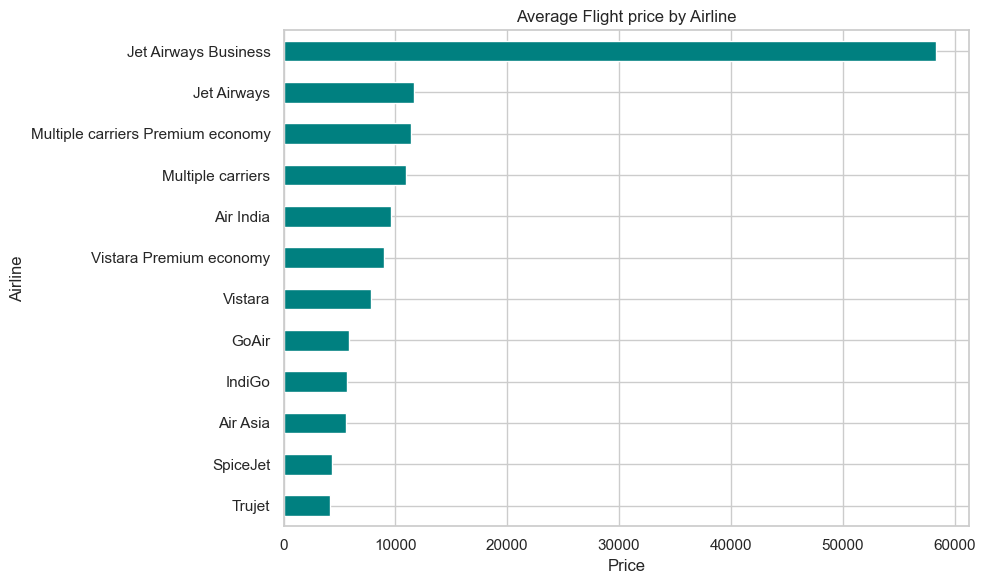

In [12]:
sns.set(style= "whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

#Average price by Airline 
airline_avg_price = df.groupby('Airline')['Price'].mean().sort_values()
airline_avg_price.plot(kind = 'barh', color = 'teal')
plt.title('Average Flight price by Airline')
plt.xlabel('Price')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()

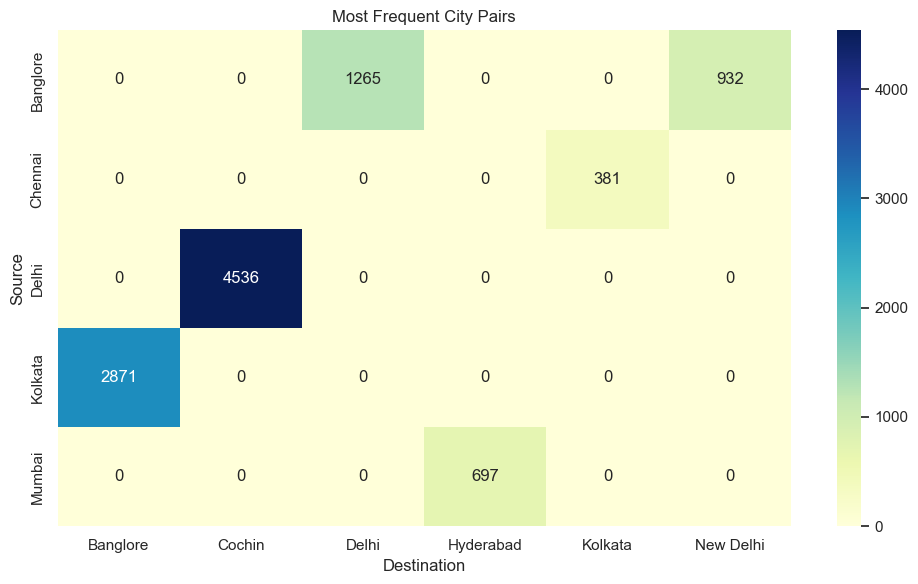

In [ ]:
#Moat comman route taken by the Airline 
route_counts = df.groupby(['Source', 'Destination']).size().unstack(fill_value=0)
sns.heatmap(route_counts, annot=True, fmt = 'd', cmap = 'YlGnBu')
plt.title("Most Frequent City Pairs")
plt.xlabel("Destination")
plt.ylabel("Source")
plt.tight_layout()
plt.show()

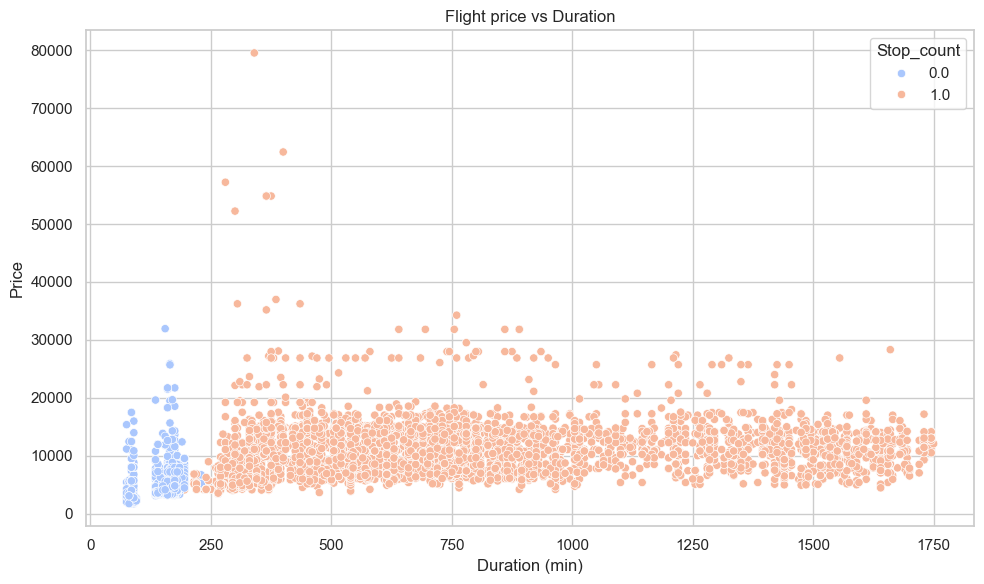

In [17]:
#Duration Vs Price 
sns.scatterplot(data = df, x = "Duration_mins", y = "Price", hue= 'Stop_count', palette= 'coolwarm')
plt.title("Flight price vs Duration")
plt.xlabel("Duration (min)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

C:\Users\91946\AppData\Local\Temp\ipykernel_1964\2419665557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data = df, x = "Stop_count", y = 'Price', palette= 'magma')


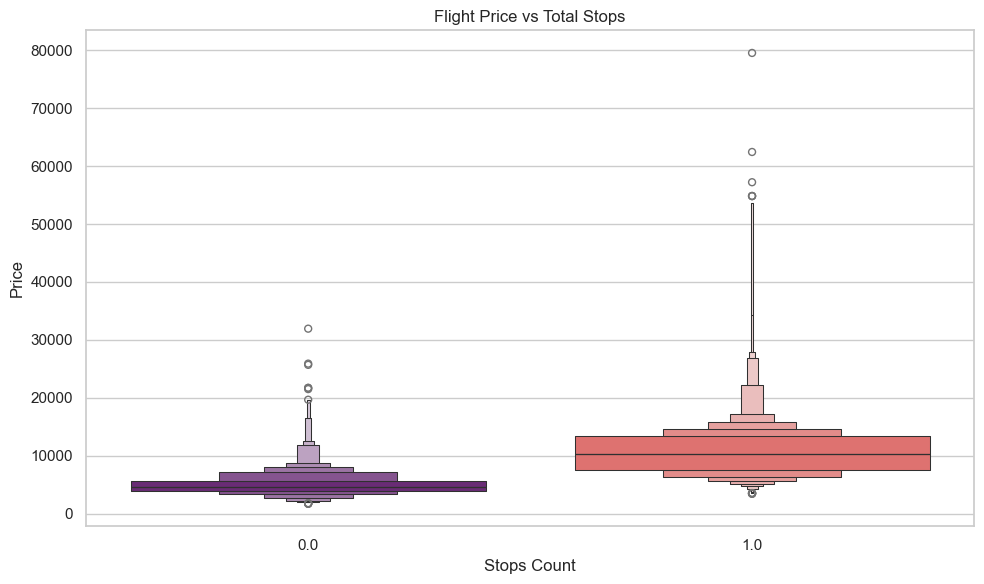

In [19]:
# Stops vs price 
sns.boxenplot(data = df, x = "Stop_count", y = 'Price', palette= 'magma')
plt.title('Flight Price vs Total Stops')
plt.xlabel('Stops Count')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


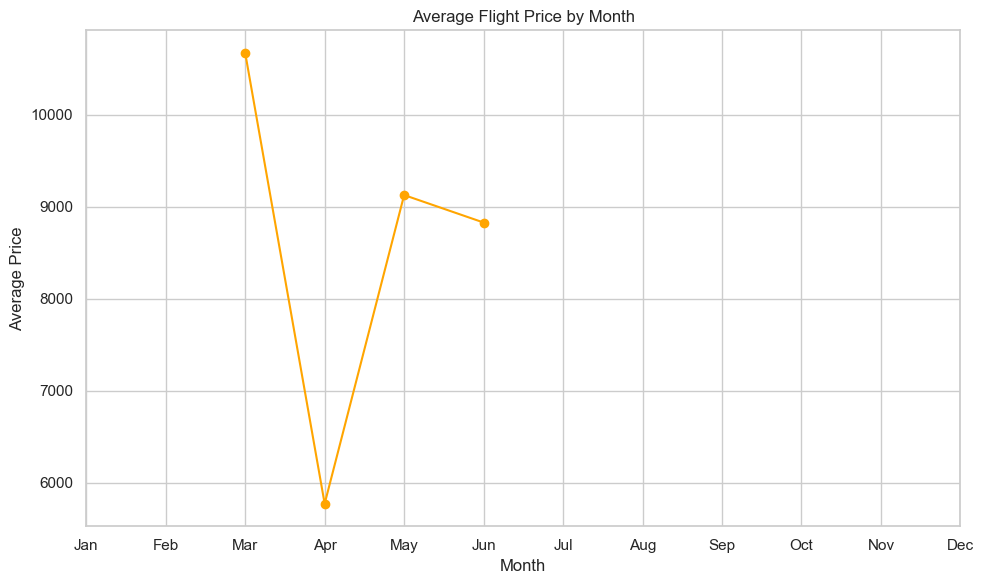

In [22]:
#Monthly price trend 
monthly_avg = df.groupby('Journey_month')['Price'].mean()
monthly_avg.plot(marker='o', color='orange')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

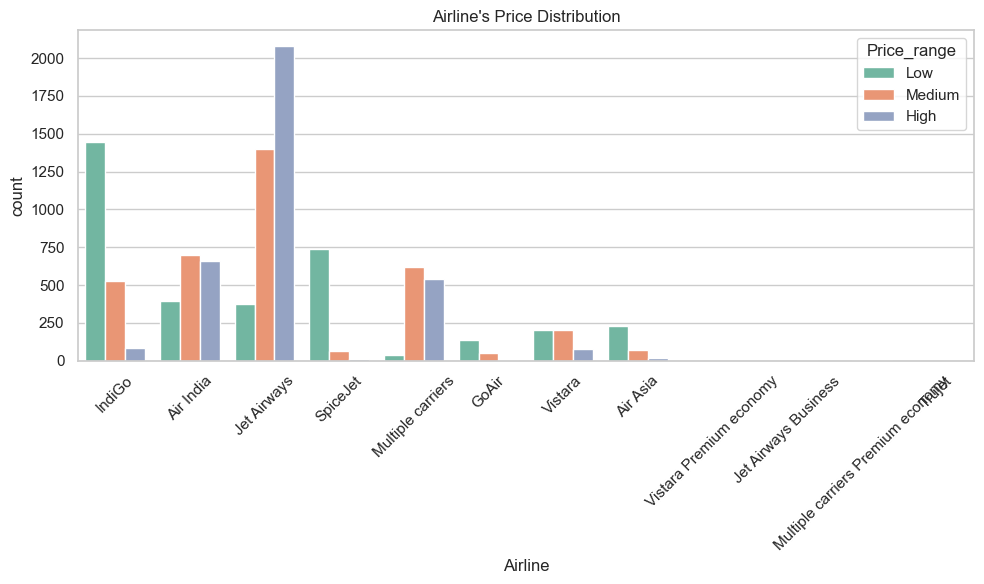

In [26]:
#Classify flights into prices range 
df['Price_range'] = pd.qcut(df['Price'], q = 3, labels = ['Low', 'Medium', "High"])
sns.countplot(data=df, x='Airline', hue='Price_range', palette='Set2')
plt.title("Airline's Price Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Dep_min,Arrival_Hour,Arrival_min,Stop_count,Journey_month,Journey_day,Dep_Hour,Dep_Minute,Arrival_Minute,Price_range
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,20,NaN,10,0.0,3,24,22,20,NaN,Low
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,50,13.0,15,NaN,5,1,5,50,15.0,Medium
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,25,NaN,25,NaN,6,9,9,25,NaN,High
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,5,23.0,30,1.0,5,12,18,5,30.0,Low
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,50,21.0,35,1.0,3,1,16,50,35.0,High
